In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d

%matplotlib inline
plt.rcParams.update({'font.size': 12})



In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/dlr_dmin.nc'
dataset = nc.Dataset(filename)

In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)



In [4]:
#df.head()

Text(0, 0.5, 'X-component of magnetic field')

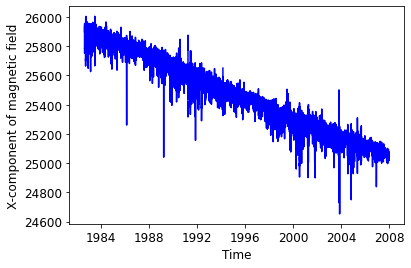

In [5]:
#All data plot
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')



In [6]:
df['Time_Diff'] = df['Time'].diff()
df['Time_Diff'].max()

Timedelta('0 days 00:01:00')

In [7]:
#for col in df.columns.to_list():
    #print(col, df[col].isna().sum())


1204370


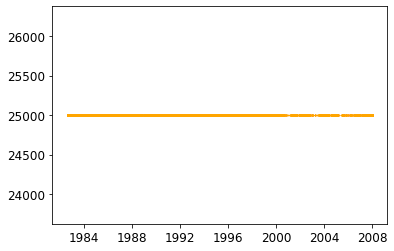

In [14]:
#Make a dropout graph

df_dlr = df[df['Time'] < pd.Timestamp(2008, 12, 31)]
inds_dlr = list(pd.isnull(df_dlr['X']).to_numpy().nonzero()[0]) 
inds_len_dlr = len(inds_dlr) 
plt.scatter(df_dlr['Time'][inds_dlr], [25000]*inds_len_dlr, color='orange', label='dropout', s=.25)
print(inds_len_dlr)



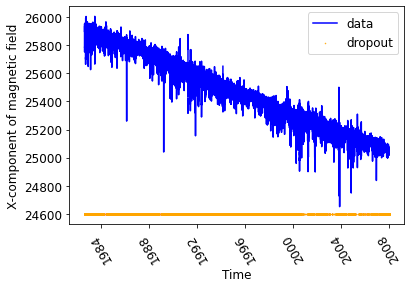

In [15]:
plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

plt.scatter(df_dlr['Time'][inds_dlr], [24600]*inds_len_dlr, color='orange', label='dropout', s=.25)

plt.xticks(rotation=120)
plt.legend()




In [16]:
rmean = df['X'].rolling(50).mean()
rstd = df['X'].rolling(50).std(ddof=1)

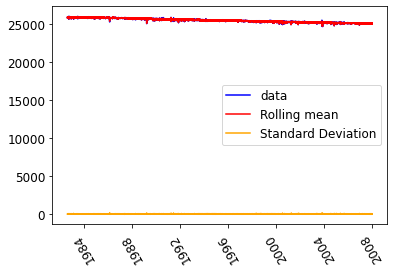

In [20]:
#Rolling mean and std

plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.plot(df['Time'], rmean, color='red', label='Rolling mean')
plt.plot(df['Time'], rstd, color='orange', label='Standard Deviation')
plt.fill_between(df['Time'], df['X'], rmean-3*rstd, rmean+3*rstd, alpha=0.5)

plt.xticks(rotation=120)
plt.legend()
plt.show()



In [22]:
df['flag'] = 0
df['flag'][df['X'].isna()==True] = 1
df['flag'].sum()



df['filled_cubic'] = df['X'].interpolate(kind='cubic')



/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_23605/3336090291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][df['X'].isna()==True] = 1


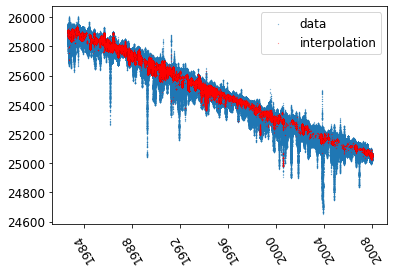

In [27]:
plt.scatter(df['Time'], df['X'], label='data', s=.05)
plt.scatter(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], label='interpolation', color='red', s=.025)

plt.xticks(rotation=120)
plt.legend()
plt.show()

In [30]:
nan_free = (df.fillna({'Z': np.round(np.std(df['Z']), 2), 'Y': np.round(np.std(df['Y']), 2), 'X': np.round(np.std(df['X']),2)}))
print(nan_free)

                        Time             X            Y        Z  \
0        1982-08-04 15:00:00  25899.085005  3992.420434  42229.0   
1        1982-08-04 15:01:00  25899.085005  3992.420434  42228.0   
2        1982-08-04 15:02:00  25899.201129  3991.667058  42228.0   
3        1982-08-04 15:03:00  25899.201129  3991.667058  42228.0   
4        1982-08-04 15:04:00  25899.201129  3991.667058  42228.0   
...                      ...           ...          ...      ...   
13363735 2007-12-31 23:55:00  25045.100000  3037.500000  40479.5   
13363736 2007-12-31 23:56:00    250.470000   277.060000  40479.5   
13363737 2007-12-31 23:57:00    250.470000   277.060000  40479.4   
13363738 2007-12-31 23:58:00    250.470000   277.060000  40479.2   
13363739 2007-12-31 23:59:00    250.470000   277.060000  40479.2   

               Time_Diff  flag  filled_cubic  
0                    NaT     0  25899.085005  
1        0 days 00:01:00     0  25899.085005  
2        0 days 00:01:00     0  25899.2011

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


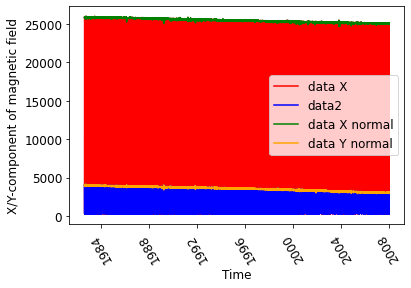

In [31]:
plt.plot(nan_free['Time'], nan_free['X'], label='data X', color='red')
plt.plot(nan_free['Time'], nan_free['Y'], label='data2', color='blue')
plt.plot(df['Time'], df['X'], label='data X normal', color='green')
plt.plot(df['Time'], df['Y'], label='data Y normal', color='orange')

plt.xlabel('Time')
plt.ylabel('X/Y-component of magnetic field')
plt.xticks(rotation=120)
plt.legend()